In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
dataset = sklearn.datasets.fetch_california_housing()

In [3]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
df["Price"] = dataset.target

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.shape

(20640, 9)

In [10]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
corr = df.corr()

<Axes: >

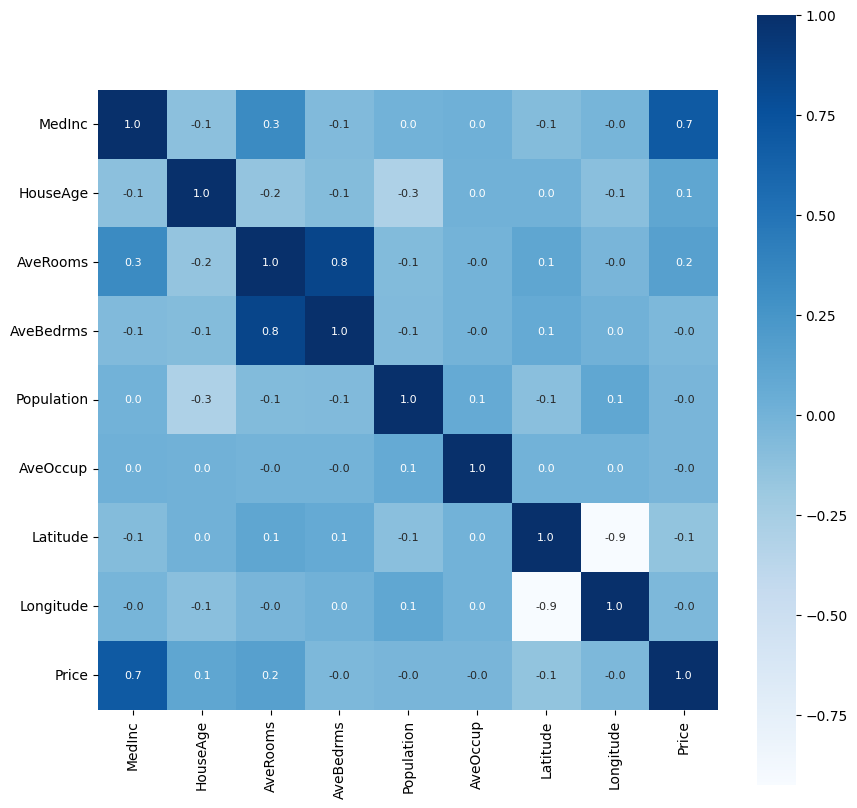

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square=True, fmt = '.1f', annot= True, annot_kws= {'size':8}, cmap='Blues')

In [16]:
x = df.drop(columns='Price', axis=1)
y = df['Price']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [18]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2072,1.4817,6.0,4.443645,1.134293,1397.0,3.350120,36.77,-119.84
10600,6.9133,8.0,5.976471,1.026471,862.0,2.535294,33.68,-117.80
2494,1.5536,25.0,4.088785,1.000000,931.0,4.350467,36.60,-120.19
4284,1.5284,31.0,2.740088,1.008811,597.0,2.629956,34.10,-118.32
16541,4.0815,21.0,5.166667,1.002688,1130.0,3.037634,37.79,-121.23
...,...,...,...,...,...,...,...,...
1099,3.0625,20.0,5.860000,1.112000,745.0,2.980000,39.59,-121.90
18898,2.6133,49.0,5.163755,1.100437,1131.0,2.469432,38.11,-122.25
11798,4.4958,19.0,5.899767,1.074592,1206.0,2.811189,38.92,-121.22
6637,2.5750,39.0,3.591203,1.086675,2546.0,3.293661,34.16,-118.14


In [19]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10385,6.4114,15.0,7.527559,1.049869,2529.0,3.318898,33.60,-117.65
1943,4.1843,12.0,6.330084,1.041783,2033.0,2.831476,38.62,-120.91
7490,1.7411,35.0,5.369159,1.294393,909.0,4.247664,33.93,-118.23
16889,3.4412,39.0,4.173405,1.074573,2156.0,1.937107,37.59,-122.37
11416,7.8195,16.0,8.602349,1.058725,2142.0,3.593960,33.70,-117.98
...,...,...,...,...,...,...,...,...
13767,4.8173,25.0,6.160494,1.081481,1071.0,2.644444,34.04,-117.12
20606,2.0800,30.0,5.140316,1.055336,1702.0,3.363636,39.12,-121.57
7340,2.1743,30.0,3.364395,0.994437,3208.0,4.461752,33.97,-118.16
14312,1.6023,32.0,3.878788,1.069697,1335.0,4.045455,32.70,-117.14


In [20]:
Y_train

,Price
2072,0.720
10600,2.741
2494,0.583
4284,2.000
16541,1.179
...,...
1099,0.938
18898,1.031
11798,1.926
6637,1.535


In [21]:
Y_test

,Price
10385,2.787
1943,2.076
7490,0.967
16889,3.538
11416,3.905
...,...
13767,1.466
20606,0.566
7340,1.760
14312,0.773


In [22]:
model = XGBRegressor()

In [23]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [27]:
# accuracy for training data
training_prediction = model.predict(X_train)
r2 = r2_score(training_prediction, Y_train)
mse = mean_squared_error(training_prediction, Y_train)
print("R2 for training", r2)
print("MSE for training", mse)

R2 for training 0.9374761324742483
MSE for training 0.0748112971690747


In [28]:
# accuracy for test data
test_prediction = model.predict(X_test)
r2 = r2_score(test_prediction, Y_test)
mse = mean_squared_error(test_prediction, Y_test)
print("R2 for training", r2)
print("MSE for training", mse)

R2 for training 0.8096220578597938
MSE for training 0.22387540906811954


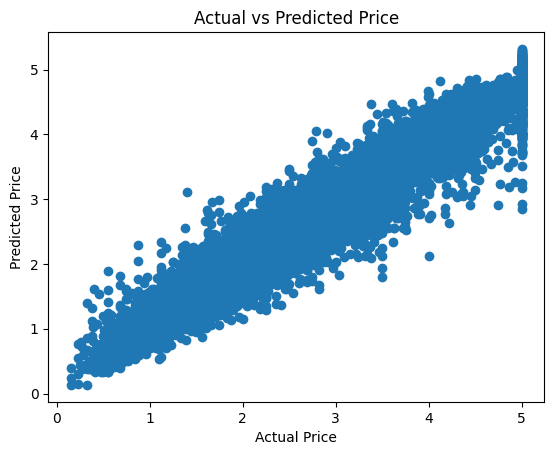

In [29]:
plt.scatter(Y_train, training_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()